Project 2
Red Wine Quality Dataset

#1. I chose to do my regression analysis on this Red Wine Quality dataset https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/ 

My most important target variable in this analysis will be "Quality."
Variables such as "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "ph", "sulphates", and "alcohol" will be helpful in predicting the quality of red wines with the measurments of these chemical characteristic variables. For this project I am interested in what makes a wine high quality. (5-8 quality rating) 

#2 Data cleaning methods

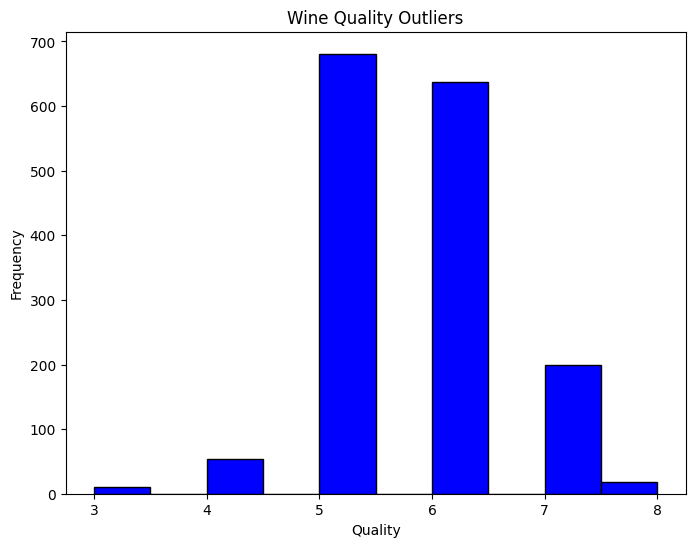

In [7]:
import pandas as pd 
file_path = r"C:\Users\kevin\Downloads\archive (2)\winequality-red.csv"
data = pd.read_csv(file_path)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.hist((data['quality']), bins=10, color='blue', edgecolor='black') #using a histogram to spot Quality outliers (i'm interested in what makes a red wine high quality)
plt.title('Wine Quality Outliers')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show() #i notice a high frequency of middle grade wine 5 & 6 quality rating.

In [49]:
data = data[data['quality'].isin([5, 6, 7, 8])] 
#now the dataset will just read data wine data with quality ratings ranging 5-8

#3 Feature Engineering

In [51]:
chemical_variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
correlation_matrix = data[chemical_variables].corr()
threshold = 0.7 
high_corr = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            variable1 = correlation_matrix.columns[i]
            variable2 = correlation_matrix.columns[j]
            high_corr.append((variable1, variable2, correlation_matrix.iloc[i, j]))

for variable1, variable2, correlation in high_corr:
    print(f"High Correlation: {variable1} and {variable2}, Correlation coefficient: {correlation}")

High Correlation: citric acid and fixed acidity, Correlation coefficient: 0.7340707167389033
High Correlation: density and fixed acidity, Correlation coefficient: 0.7761168460937885
High Correlation: pH and fixed acidity, Correlation coefficient: -0.7695802807016945
High Correlation: pH and citric acid, Correlation coefficient: -0.7154737997506835


By using correlation matrix I am able to distinguish which chemical variables are highly correlated. This will help me determine which variables are most important when predicting a high quality wine given the variables. 

The relation of citric acid and fixed acidity would be described as highly positive. As one of these variables increase the other tends to increase as well. In wine making or being the wine taster, you may find that you enjoy a high correlation between citric acid and fixed acidity. 

The pH and fixed acidity variables have a high negative correlation. This means as the pH level increases you should expect the fixed acidity level to decrease. 

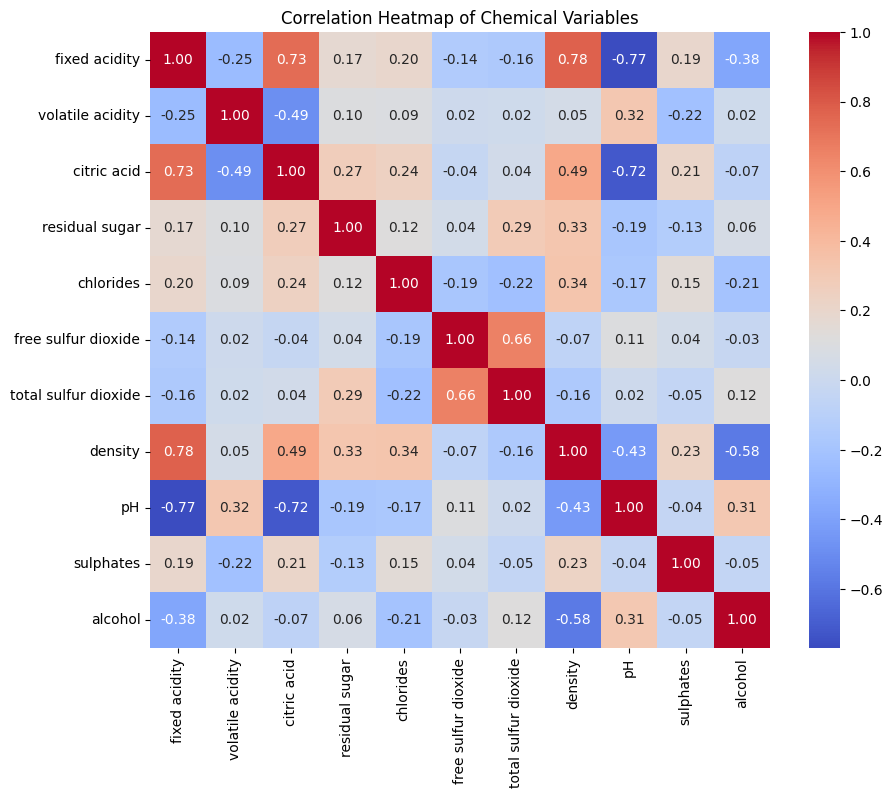

In [52]:
import seaborn as sns

chemical_variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

correlation_matrix = data[chemical_variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Chemical Variables")
plt.show()

Heatmaps offer a great visualization of the correlation between variables. 

In [64]:
corr = data.corr()
print(corr) #simple correlation method

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.251427     0.734071   
volatile acidity          -0.251427          1.000000    -0.492183   
citric acid                0.734071         -0.492183     1.000000   
residual sugar             0.171470          0.104481     0.267611   
chlorides                  0.196827          0.094739     0.241087   
free sulfur dioxide       -0.141558          0.015892    -0.035118   
total sulfur dioxide      -0.160504          0.020541     0.038613   
density                    0.776117          0.051042     0.493409   
pH                        -0.769580          0.321291    -0.715474   
sulphates                  0.192014         -0.221008     0.211654   
alcohol                   -0.378985          0.018899    -0.072862   
quality                         NaN               NaN          NaN   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

#4 Build Prediction Model

In [55]:
from sklearn.model_selection import train_test_split

X = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

print("Training Set Size:", len(X_train))
print("Testing Set Size:", len(X_test))

Training Set Size: 139
Testing Set Size: 60


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)

y_pred = linear_reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared (R²):",r2)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R-squared (R²): 1.0


I decided to use the Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R Squared to train my prediction model. The results are perfect (overfitting), which I am cautious of. I believe this is the case because I chose one of the most popular datasets for practicing linear regression and correlation. 
Each of the metrics I chose to test are resulting in scores that indicate the model is overfitting. 
In my cleaning I chose to just focus on rows that fit high quality wine ratings of 5-8, this may be a factor in these results since I am searching for chemical variables that correlate to high quality wine. These are a few reasons why I consider this a bad model to test new variable inputs/training data with. 

The main takeaway I found with this dataset is the correlation between variables and what makes a quality wine.
Since I decided to read the excel file for wine quality ratings of 5-8, these are the higher grade quality wines results with correlated variables. It's most interesting to me that density and fixed acidity is the highest positive correlation. I can see a real world use case with this project!
High Correlation: citric acid and fixed acidity, Correlation coefficient: 0.7340707167389033 
High Correlation: density and fixed acidity, Correlation coefficient: 0.7761168460937885
High Correlation: pH and fixed acidity, Correlation coefficient: -0.7695802807016945
High Correlation: pH and citric acid, Correlation coefficient: -0.7154737997506
- Kevin Bennett835